<a href="https://colab.research.google.com/github/tpaldenb/Dry-Bean-Classification/blob/main/Dry_Bean_Classification_using_sample_undersampling_and_boxcox_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# creating DataFrame from the dataset
beans_df = pd.read_csv('Dry_Bean_Dataset.csv')
beans_df.sample(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
8690,44355,789.387,300.714314,188.435193,1.595850,0.779321,44840,237.643725,0.811115,0.989184,0.894484,0.790264,0.006780,0.001631,0.624517,0.996636,SIRA
10866,28182,620.793,228.784066,157.277567,1.454652,0.726232,28529,189.426600,0.799353,0.987837,0.918942,0.827971,0.008118,0.002353,0.685536,0.997216,DERMASON
12575,34909,698.071,263.934397,168.802178,1.563572,0.768740,35334,210.825803,0.762872,0.987972,0.900219,0.798781,0.007561,0.001899,0.638051,0.997639,DERMASON
2073,50978,881.559,323.106235,201.100688,1.606689,0.782701,51805,254.768926,0.708914,0.984036,0.824309,0.788499,0.006338,0.001511,0.621731,0.998928,BARBUNYA
1964,50253,864.971,285.970002,224.164791,1.275713,0.620918,51027,252.950799,0.766753,0.984832,0.844051,0.884536,0.005691,0.002149,0.782404,0.998123,SEKER
6449,53679,913.665,377.958750,181.226069,2.085565,0.877549,54238,261.431110,0.604473,0.989694,0.808054,0.691692,0.007041,0.000994,0.478438,0.997814,HOROZ
295,35091,688.220,225.852180,197.988503,1.140734,0.481167,35466,211.374665,0.780251,0.989426,0.931003,0.935898,0.006436,0.003046,0.875906,0.999175,SEKER
7774,39631,740.396,268.296027,188.683768,1.421935,0.710926,40053,224.632492,0.761183,0.989464,0.908483,0.837256,0.006770,0.002052,0.700998,0.996773,SIRA
214,34483,687.567,233.740724,188.587866,1.239426,0.590790,35051,209.535484,0.740678,0.983795,0.916611,0.896444,0.006778,0.002700,0.803612,0.996018,SEKER
823,38216,710.146,241.949265,201.204596,1.202504,0.555378,38542,220.585862,0.776748,0.991542,0.952269,0.911703,0.006331,0.002698,0.831202,0.999524,SEKER


In [ ]:
# displaying unique class values
beans_df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [ ]:
# checking datatypes
beans_df.dtypes

,0
Area,int64
Perimeter,float64
MajorAxisLength,float64
MinorAxisLength,float64
AspectRation,float64
Eccentricity,float64
ConvexArea,int64
EquivDiameter,float64
Extent,float64
Solidity,float64


In [ ]:
# 13611 number of entries
beans_df['Class'].count()

np.int64(13611)

In [ ]:
# to drop null values
beans_df.dropna(axis = 0)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [ ]:
beans_df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [ ]:
beans_df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
beans_df['Class'].describe()

,Class
count,13611
unique,7
top,DERMASON
freq,3546


In [ ]:
beans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
for col in beans_df.columns:
  print(col + ':', beans_df[col].unique())

Area: [28395 28734 29380 ... 42139 42147 42159]
Perimeter: [610.291 638.018 624.11  ... 759.321 763.779 772.237]
MajorAxisLength: [208.1781167 200.5247957 212.8261299 ... 281.5399279 283.3826364
 295.142741 ]
MinorAxisLength: [173.888747  182.7344194 175.9311426 ... 191.1879789 190.2757308
 182.2047159]
AspectRation: [1.19719142 1.09735646 1.20971266 ... 1.47258175 1.48932623 1.61984139]
Eccentricity: [0.54981219 0.41178525 0.56272732 ... 0.73406478 0.74105479 0.78669302]
ConvexArea: [28715 29172 29690 ... 42494 42667 42600]
EquivDiameter: [190.1410973 191.2727505 193.4109041 ... 231.6312612 231.6532475
 231.6862231]
Extent: [0.76392252 0.78396813 0.77811325 ... 0.72993244 0.70538912 0.7889625 ]
Solidity: [0.988856   0.9849856  0.98955877 ... 0.98989875 0.98781259 0.98964789]
roundness: [0.95802713 0.88703364 0.94784947 ... 0.91842409 0.90790646 0.88838037]
Compactness: [0.91335776 0.95386084 0.90877424 ... 0.8227297  0.81745745 0.78499719]
ShapeFactor1: [0.00733151 0.00697866 0.007243

In [ ]:
for cl in beans_df['Class'].unique():
  print(cl)
  print(beans_df[beans_df['Class'] == cl].describe())
  print()

SEKER
               Area    Perimeter  MajorAxisLength  MinorAxisLength  \
count   2027.000000  2027.000000      2027.000000      2027.000000   
mean   39881.299951   727.672440       251.291957       201.909653   
std     4779.877395    47.849014        19.969504        10.942797   
min    28395.000000   610.291000       200.524796       171.210559   
25%    36408.000000   692.948500       237.037081       193.919169   
50%    39180.000000   721.292000       249.152044       200.432810   
75%    42700.000000   755.011500       262.802106       208.745418   
max    61150.000000   933.372000       339.931533       252.287649   

       AspectRation  Eccentricity    ConvexArea  EquivDiameter       Extent  \
count   2027.000000   2027.000000   2027.000000    2027.000000  2027.000000   
mean       1.245182      0.584781  40269.567341     224.948441     0.771674   
std        0.082223      0.071265   4823.866621      13.294146     0.018828   
min        1.024868      0.218951  28715.000000

In [ ]:
beans_types = beans_df['Class']
beans_types

,Class
0,SEKER
1,SEKER
2,SEKER
3,SEKER
4,SEKER
...,...
13606,DERMASON
13607,DERMASON
13608,DERMASON
13609,DERMASON


In [ ]:
beans_types.value_counts()

,count
Class,
DERMASON,3546
SIRA,2636
SEKER,2027
HOROZ,1928
CALI,1630
BARBUNYA,1322
BOMBAY,522


In [ ]:
species_counts = beans_types.value_counts().values
species_names = beans_types.value_counts().index

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

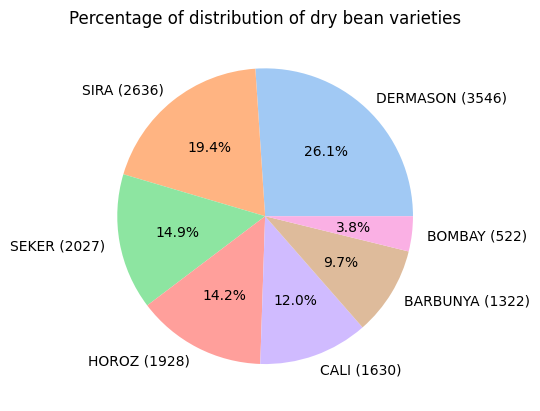

In [ ]:
# PIE CHART REPRESENTATION OF DISTRIBUTION OF CLASSES
plt.pie(species_counts, labels=[f'{name} ({count})' for name, count in zip(species_names, species_counts)], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Percentage of distribution of dry bean varieties')
plt.show()

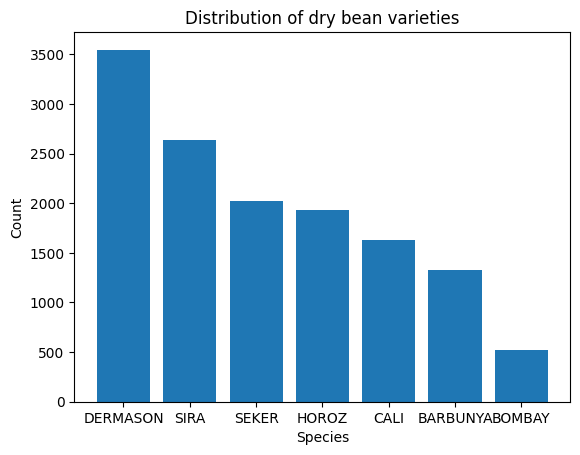

In [ ]:
plt.bar(species_names, species_counts)
plt.title('Distribution of dry bean varieties')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

In [ ]:
min_count = species_counts.min()
min_count

np.int64(522)

In [ ]:
# balancing dataset by using sample undersampling
beans_df_undersampled = beans_df.groupby('Class').apply(lambda x: x.sample(min_count)).reset_index(drop=True)
beans_df_undersampled

<ipython-input-104-ecda88a14f0c>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  beans_df_undersampled = beans_df.groupby('Class').apply(lambda x: x.sample(min_count)).reset_index(drop=True)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,98277,1289.679,436.353702,287.678470,1.516810,0.751899,100632,353.737421,0.706556,0.976598,0.742503,0.810667,0.004440,0.001183,0.657181,0.996818,BARBUNYA
1,84390,1131.241,396.259749,271.692170,1.458488,0.727939,85574,327.793662,0.773589,0.986164,0.828687,0.827219,0.004696,0.001356,0.684292,0.998031,BARBUNYA
2,66483,1030.876,375.319902,226.100949,1.659966,0.798178,67668,290.944642,0.701519,0.982488,0.786154,0.775191,0.005645,0.001257,0.600921,0.997509,BARBUNYA
3,80107,1128.926,393.662563,260.423834,1.511623,0.749909,81661,319.367187,0.705459,0.980970,0.789859,0.811271,0.004914,0.001313,0.658161,0.994892,BARBUNYA
4,61442,992.086,337.908599,232.440215,1.453744,0.725825,62709,279.696951,0.709164,0.979796,0.784470,0.827730,0.005500,0.001592,0.685136,0.996013,BARBUNYA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,40556,765.979,287.649187,180.490459,1.593709,0.778643,41153,227.238868,0.671513,0.985493,0.868623,0.789986,0.007093,0.001704,0.624078,0.994599,SIRA
3650,43592,781.821,303.417117,183.245015,1.655800,0.797032,43979,235.590870,0.791388,0.991200,0.896194,0.776459,0.006960,0.001561,0.602888,0.998262,SIRA
3651,46218,820.662,314.513297,187.977353,1.673145,0.801737,46825,242.583151,0.668663,0.987037,0.862367,0.771297,0.006805,0.001486,0.594899,0.995352,SIRA
3652,52165,865.845,336.211745,198.486440,1.693878,0.807139,52639,257.717948,0.781990,0.990995,0.874397,0.766535,0.006445,0.001373,0.587575,0.995281,SIRA


In [ ]:
# dataset is balanced
beans_df_undersampled['Class'].value_counts()

,count
Class,
BARBUNYA,522
BOMBAY,522
CALI,522
DERMASON,522
HOROZ,522
SEKER,522
SIRA,522


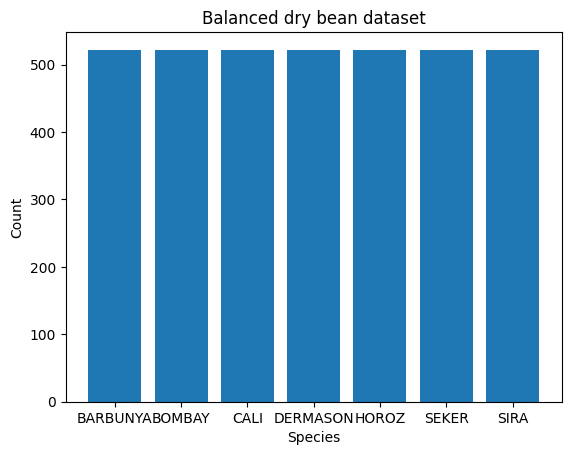

In [ ]:
plt.bar(beans_df_undersampled['Class'].value_counts().index, beans_df_undersampled['Class'].value_counts().values)
plt.title('Balanced dry bean dataset')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

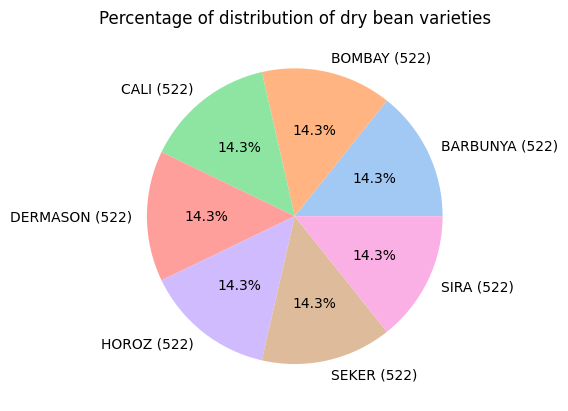

In [ ]:
class_counts = beans_df_undersampled["Class"].value_counts()
plt.pie(
    class_counts.values,
    labels=[f'{name} ({count})' for name, count in class_counts.items()],
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel')
)
plt.title('Percentage of distribution of dry bean varieties')
plt.show()

In [ ]:
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

In [ ]:
beans_transformed = beans_df_undersampled.copy()

# Box-Cox Transformation
for col in beans_transformed.select_dtypes(include=['float64', 'int64']).columns:
    beans_transformed[col], _ = boxcox(beans_transformed[col])

beans_transformed.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,1.454964,0.997595,1.476538,0.591993,0.449780,-0.160393,1.465457,0.727544,-0.129854,-0.006765,-0.117280,-0.229988,-0.588505,-12.487185,-0.459975,-0.003319
std,0.000260,0.000286,0.006024,0.000026,0.149332,0.034288,0.000273,0.000110,0.009867,0.000922,0.045556,0.077104,0.000037,1.280330,0.154208,0.001611
min,1.454183,0.996810,1.460768,0.591888,0.041058,-0.244122,1.464642,0.727213,-0.152805,-0.009086,-0.272678,-0.434654,-0.588581,-15.695191,-0.869307,-0.007037
25%,1.454773,0.997361,1.471339,0.591976,0.363259,-0.180651,1.465256,0.727463,-0.137551,-0.007420,-0.150075,-0.276480,-0.588528,-13.501537,-0.552959,-0.004588
50%,1.454955,0.997614,1.477444,0.591989,0.450367,-0.159177,1.465448,0.727540,-0.129080,-0.006706,-0.118687,-0.230163,-0.588500,-12.549841,-0.460326,-0.003206
75%,1.455125,0.997777,1.480235,0.592008,0.539219,-0.138313,1.465627,0.727613,-0.122473,-0.006101,-0.085420,-0.184767,-0.588481,-11.393401,-0.369533,-0.001975
max,1.455495,0.998200,1.489459,0.592045,0.849056,-0.079677,1.466018,0.727769,-0.097709,-0.004038,-0.009236,-0.020775,-0.588354,-9.715591,-0.041550,-0.000354


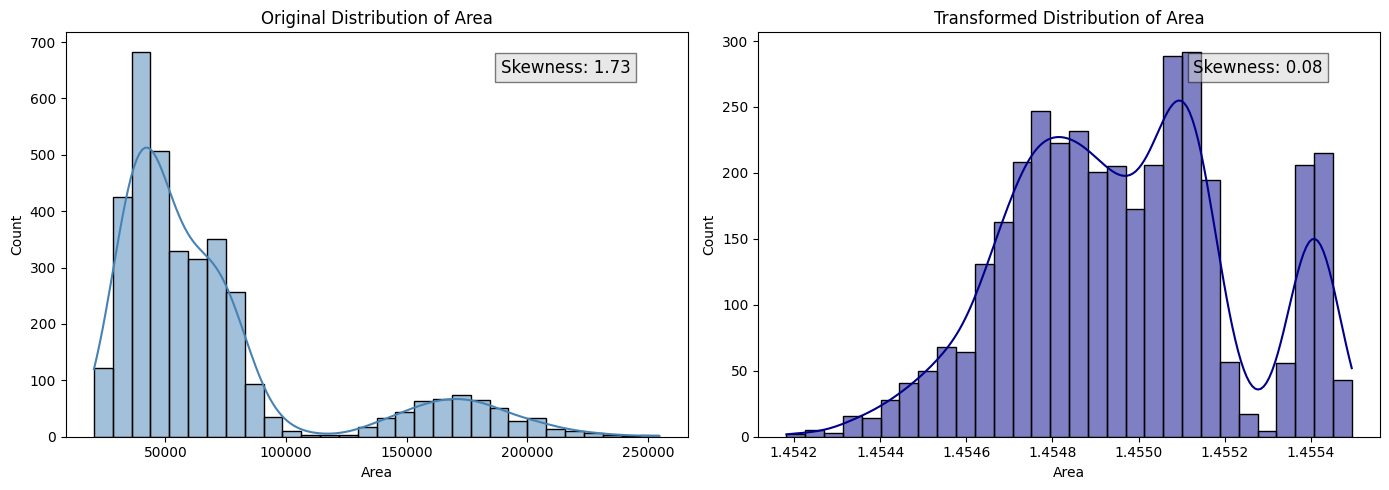

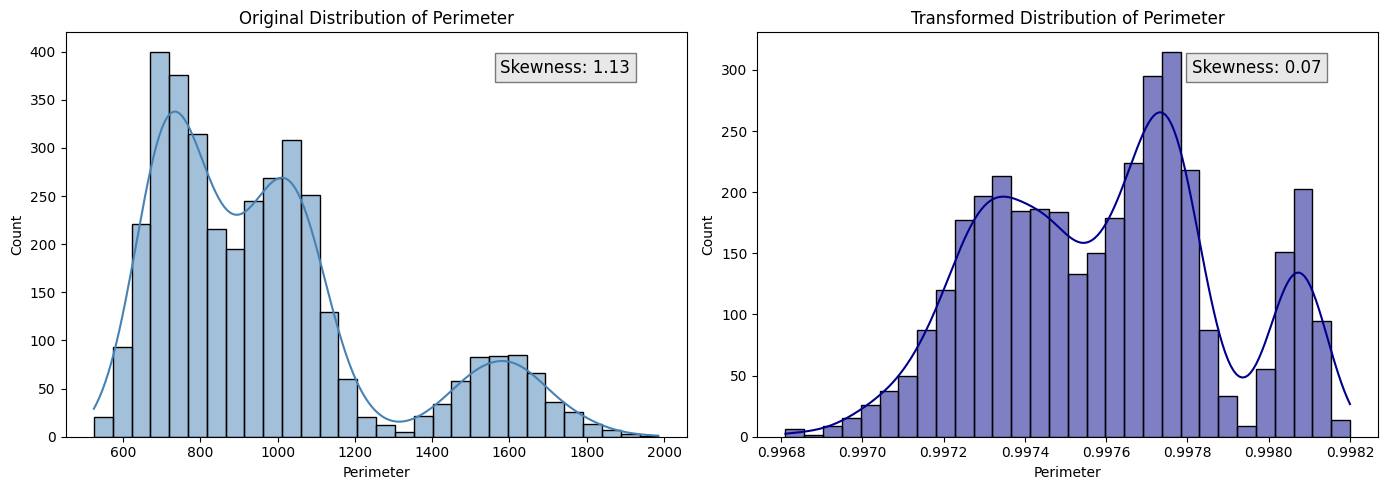

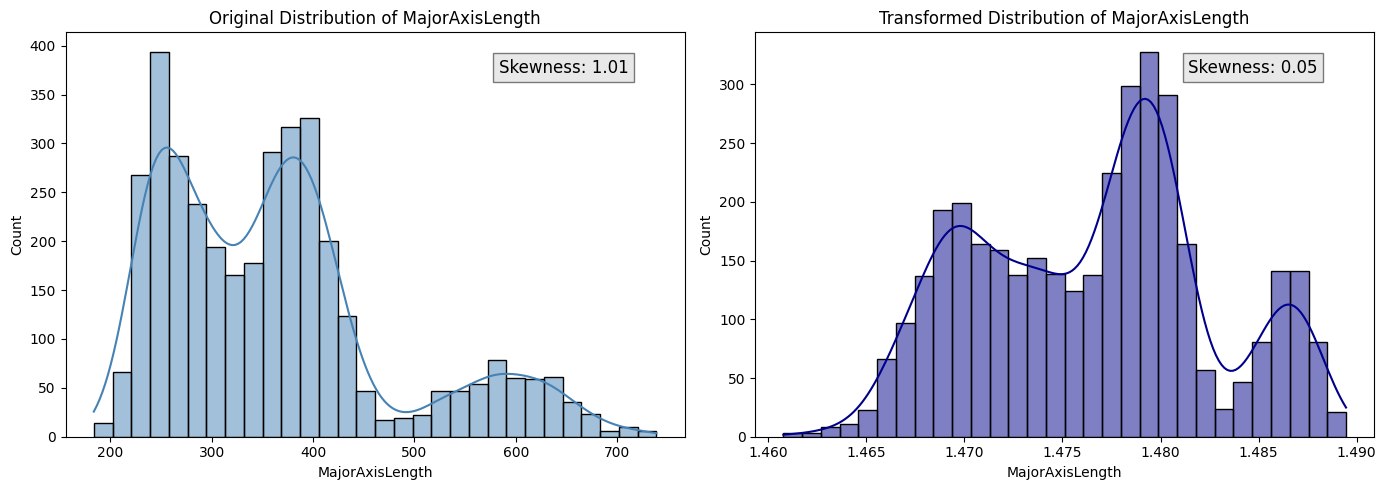

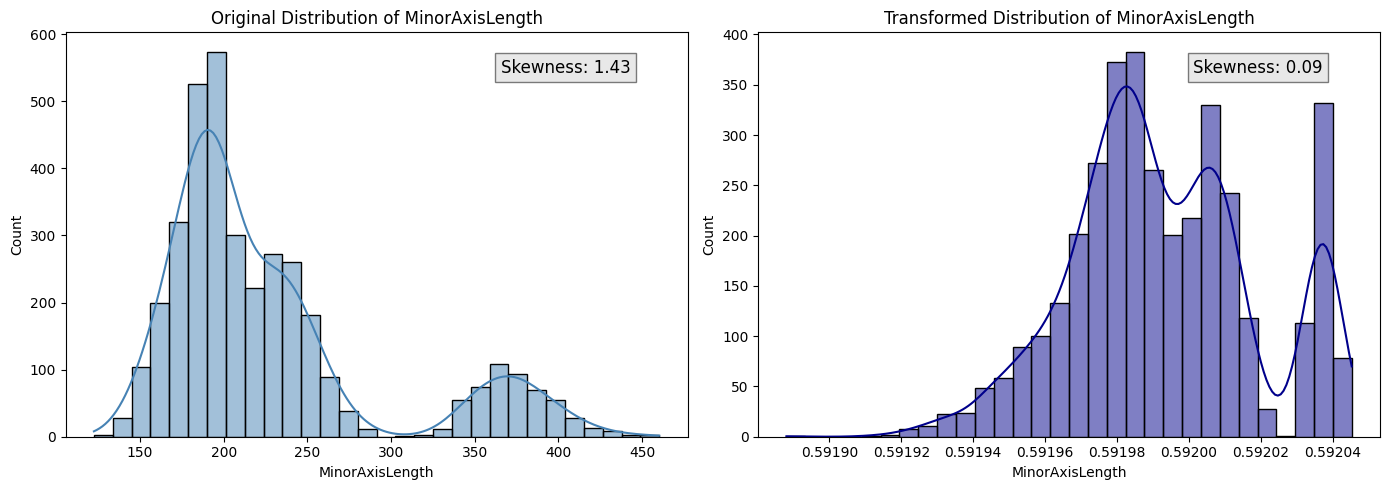

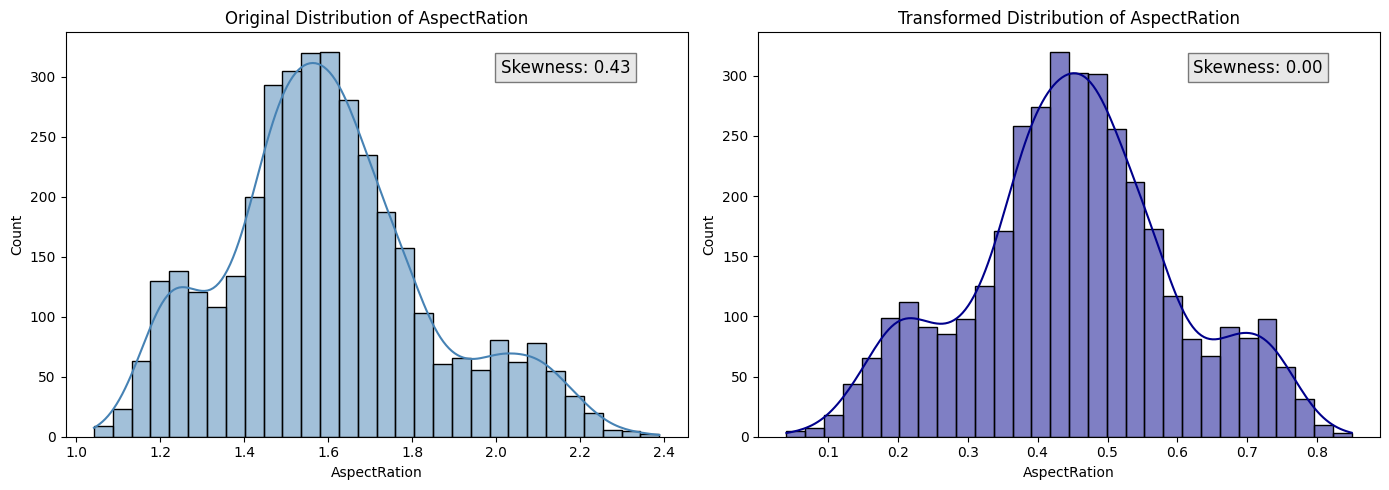

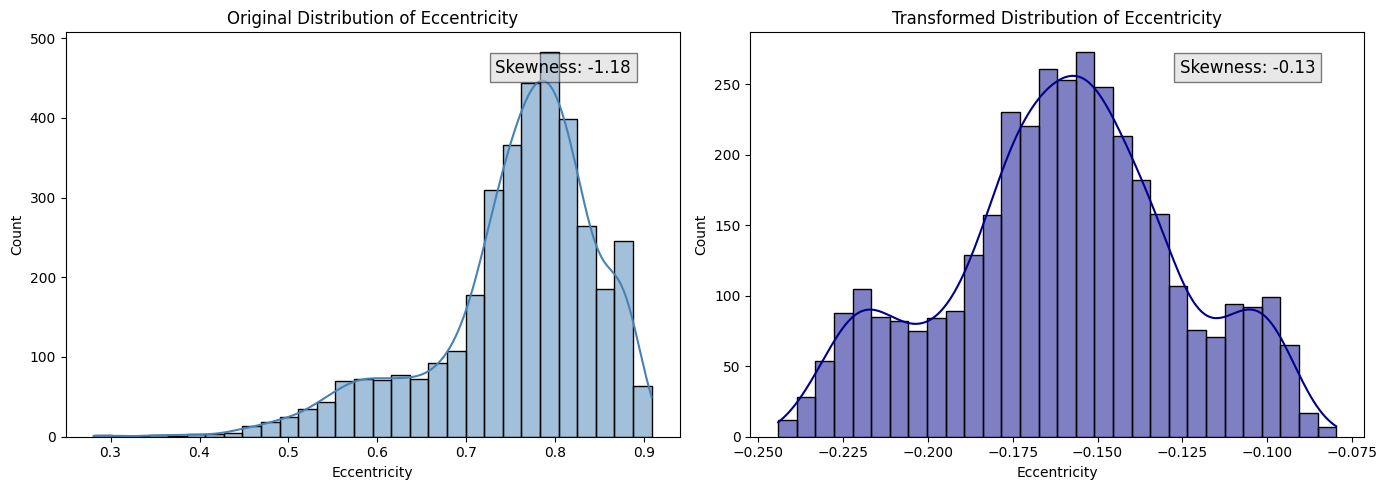

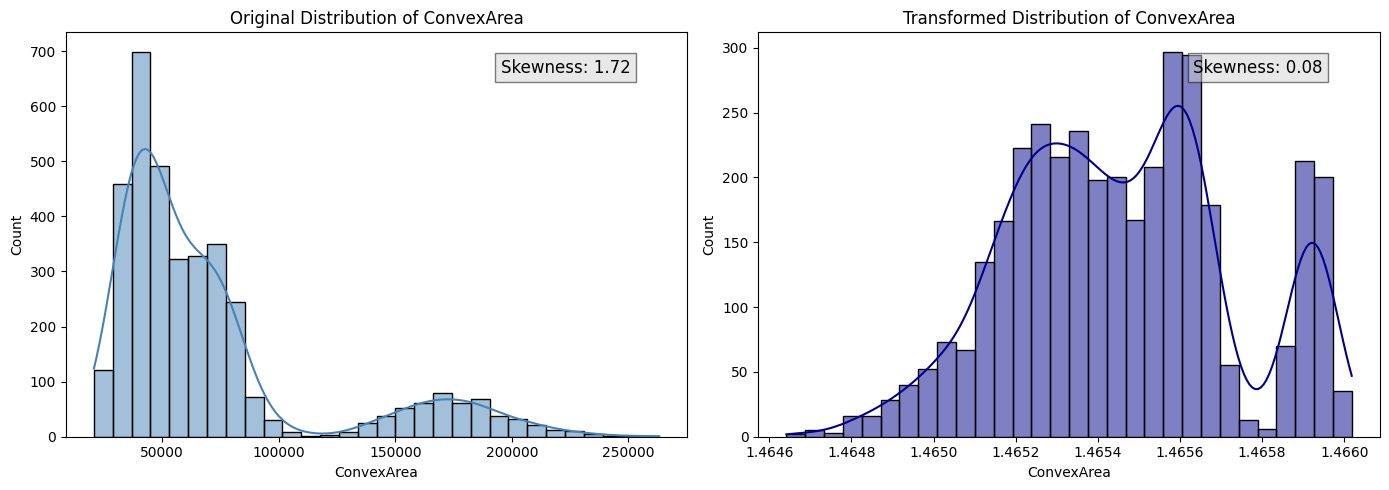

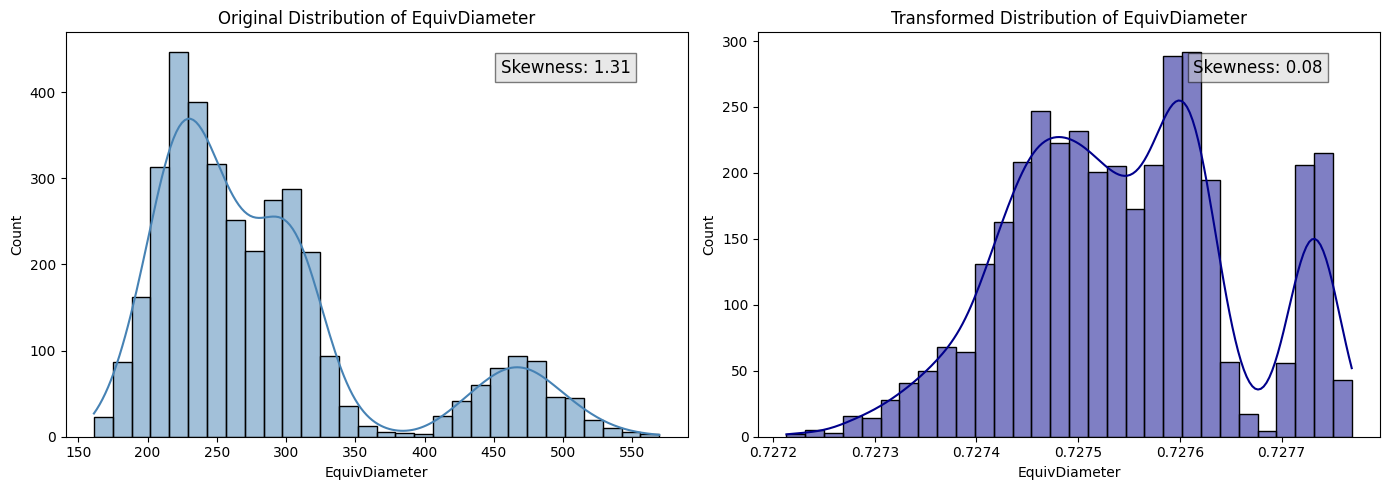

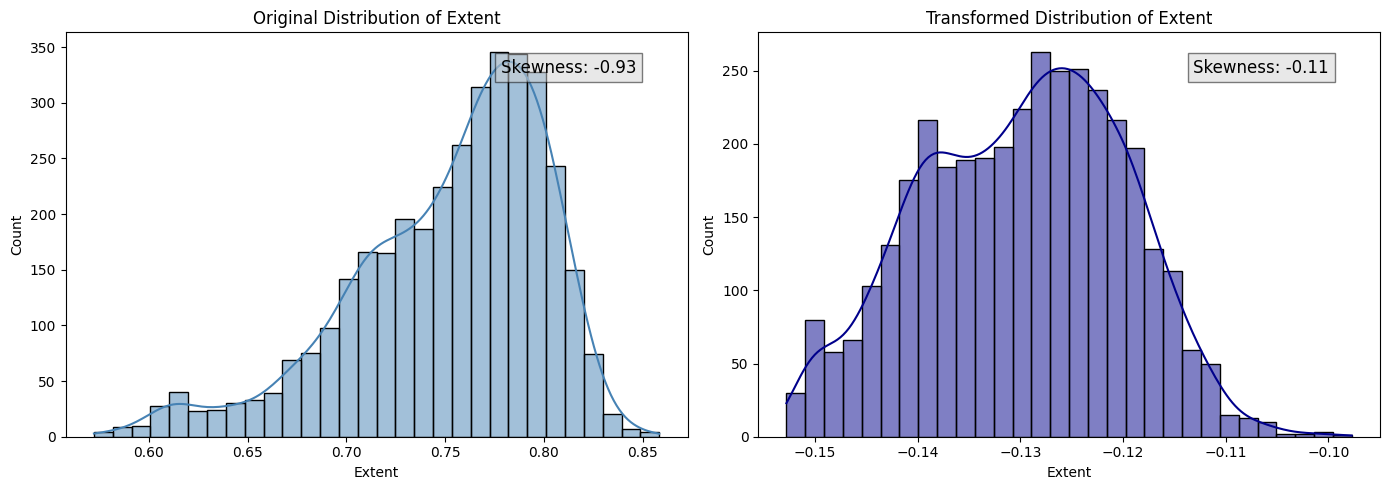

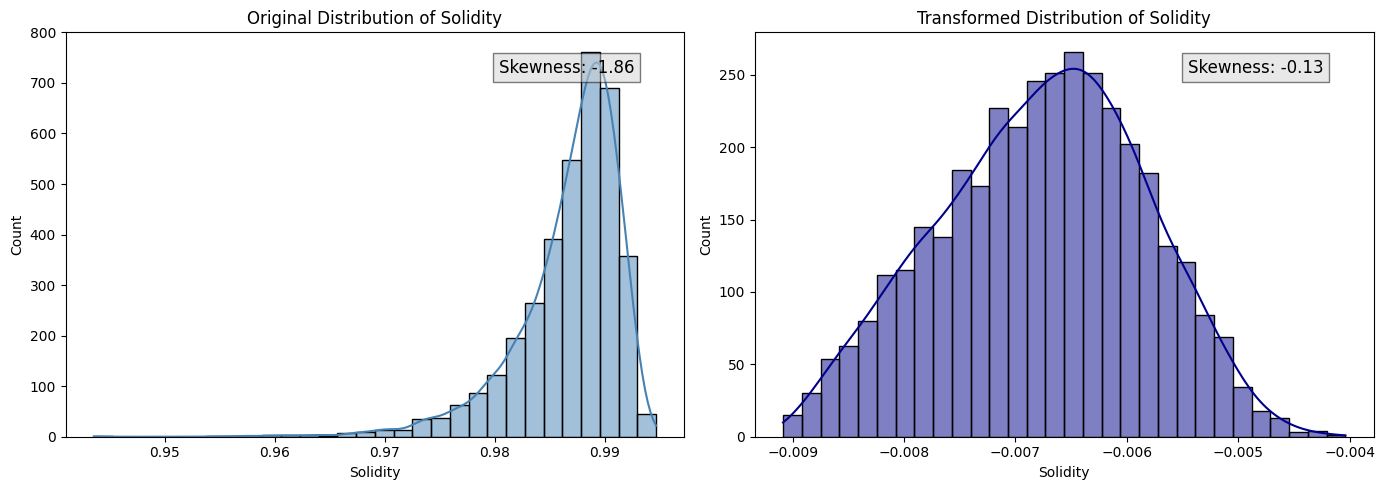

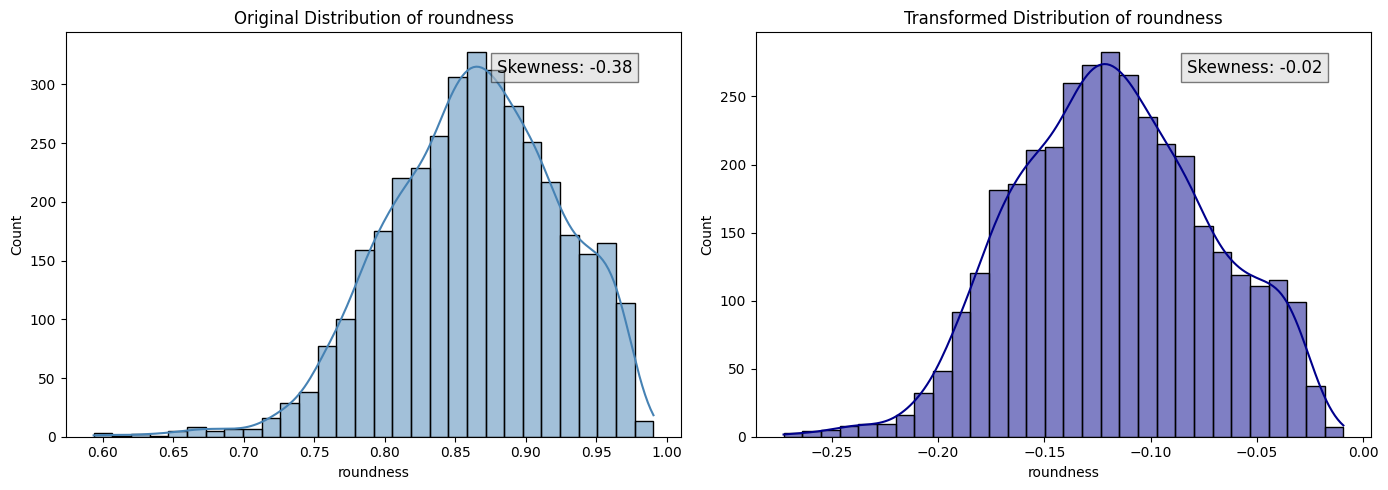

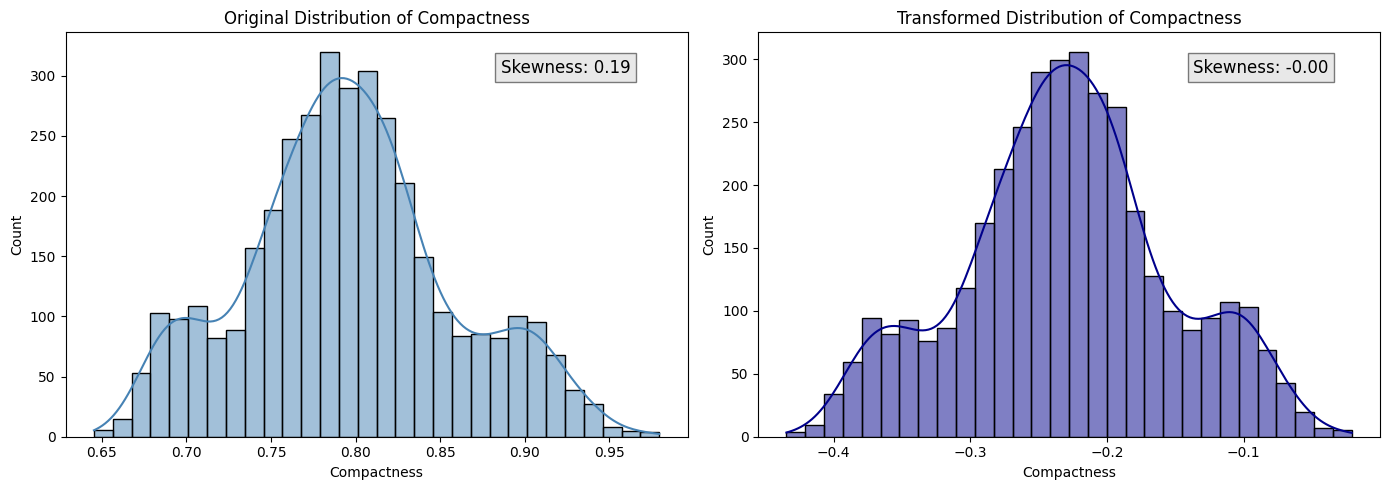

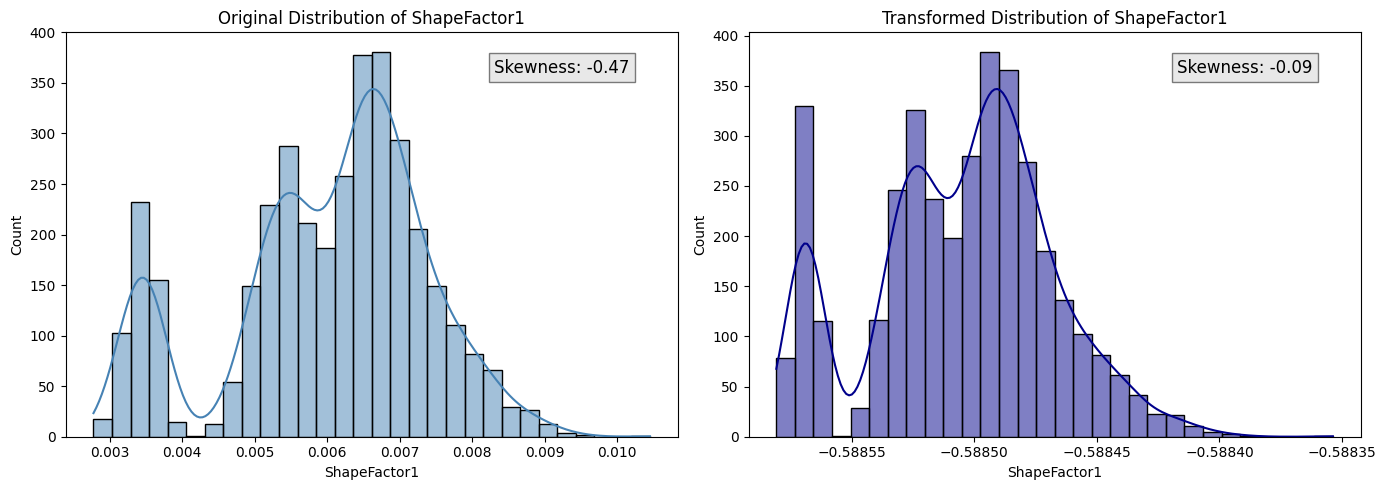

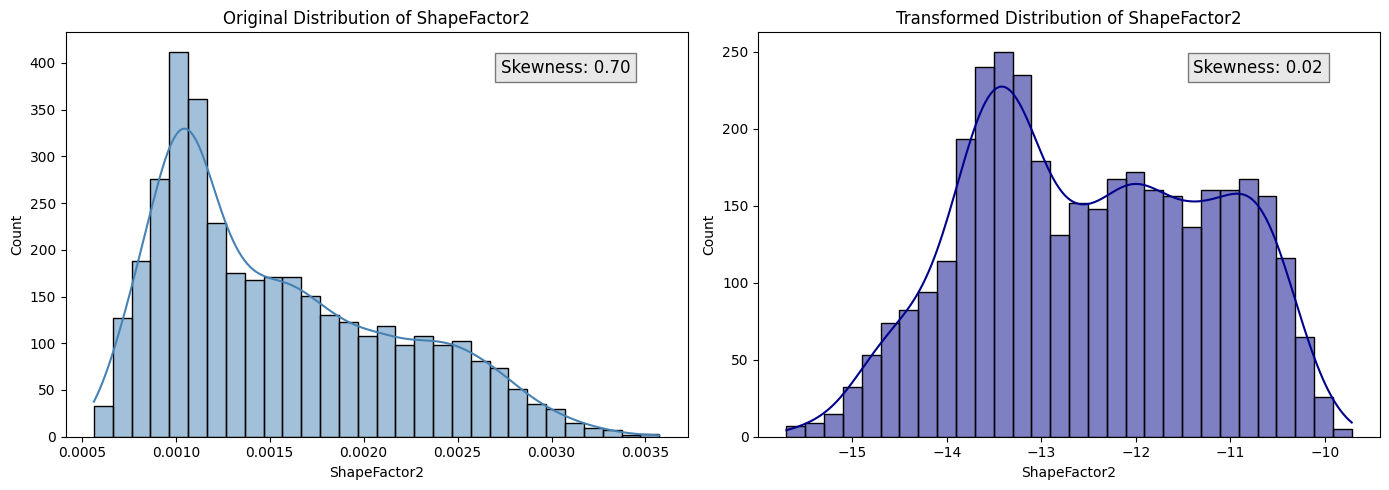

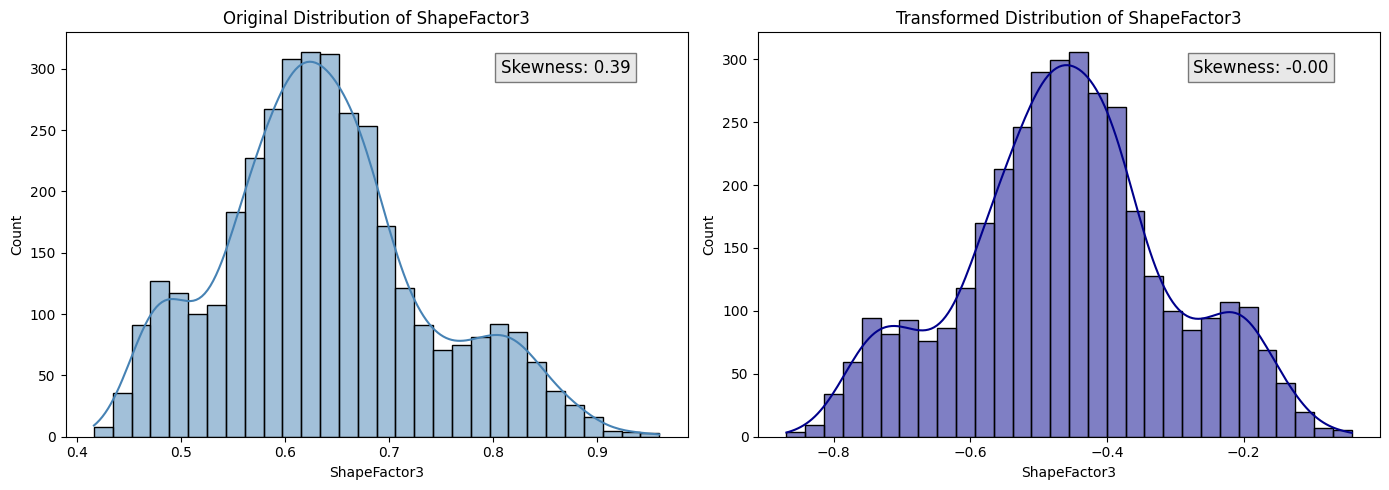

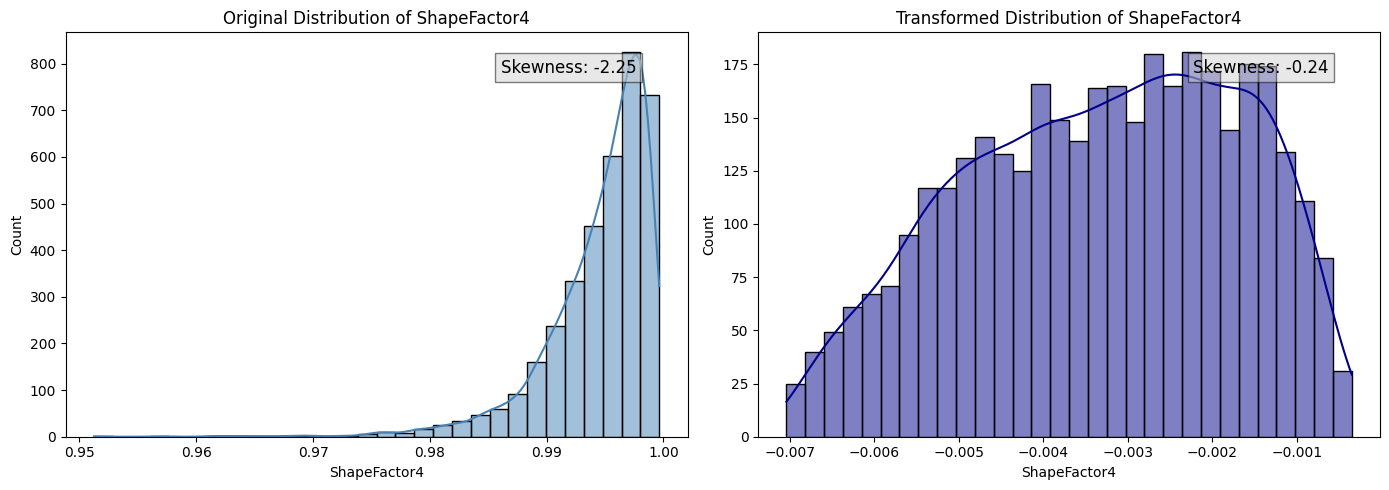

In [ ]:
from scipy.stats import skew

features_to_compare = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']

for feature in features_to_compare:
  skew_before = skew(beans_df_undersampled[feature])
  skew_after = skew(beans_transformed[feature])

  # subplots
  fig, axes = plt.subplots(1, 2, figsize=(14, 5))

  # Original Data Distribution
  sns.histplot(beans_df_undersampled[feature], kde=True, bins=30, ax=axes[0], color='steelblue')
  axes[0].set_title(f'Original Distribution of {feature}')
  axes[0].set_xlabel(feature)
  axes[0].text(0.7, 0.9, f'Skewness: {skew_before:.2f}', transform=axes[0].transAxes, fontsize=12, bbox=dict(facecolor='lightgray', alpha=0.5))

  # Transformed Data Distribution
  sns.histplot(beans_transformed[feature], kde=True, bins=30, ax=axes[1], color='darkblue')
  axes[1].set_title(f'Transformed Distribution of {feature}')
  axes[1].set_xlabel(feature)
  axes[1].text(0.7, 0.9, f'Skewness: {skew_after:.2f}', transform=axes[1].transAxes, fontsize=12, bbox=dict(facecolor='lightgray', alpha=0.5))

  plt.tight_layout()
  plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
X = beans_transformed.drop(columns = ['Class'])
y = beans_transformed['Class']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

# Model Performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf:.4f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred_rf))

Accuracy: 0.9398

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       128
           1       1.00      1.00      1.00        98
           2       0.94      0.96      0.95       103
           3       0.91      0.91      0.91       105
           4       0.92      0.98      0.95        96
           5       0.92      0.99      0.95        91
           6       0.90      0.82      0.86       110

    accuracy                           0.94       731
   macro avg       0.94      0.94      0.94       731
weighted avg       0.94      0.94      0.94       731



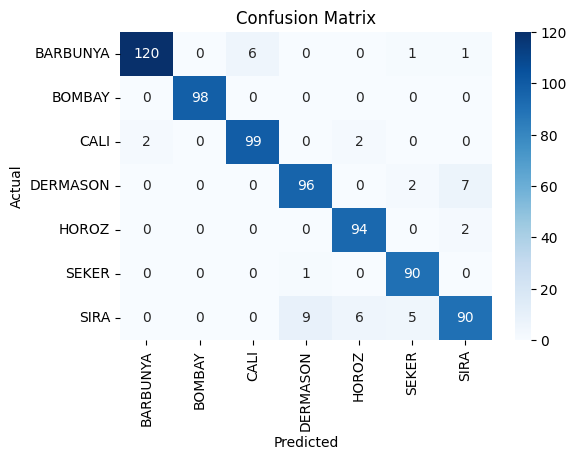

Class Mapping: {0: 'BARBUNYA', 1: 'BOMBAY', 2: 'CALI', 3: 'DERMASON', 4: 'HOROZ', 5: 'SEKER', 6: 'SIRA'}


In [ ]:
# Get class names
class_names = label_encoder.classes_

# Plot Confusion Matrix with Class Labels
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print class mapping for reference
class_mapping = dict(enumerate(class_names))
print("Class Mapping:", class_mapping)


In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy_xgb:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

Accuracy: 0.9289

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94       128
           1       1.00      1.00      1.00        98
           2       0.91      0.97      0.94       103
           3       0.88      0.87      0.87       105
           4       0.91      0.98      0.94        96
           5       0.94      0.99      0.96        91
           6       0.88      0.83      0.85       110

    accuracy                           0.93       731
   macro avg       0.93      0.93      0.93       731
weighted avg       0.93      0.93      0.93       731



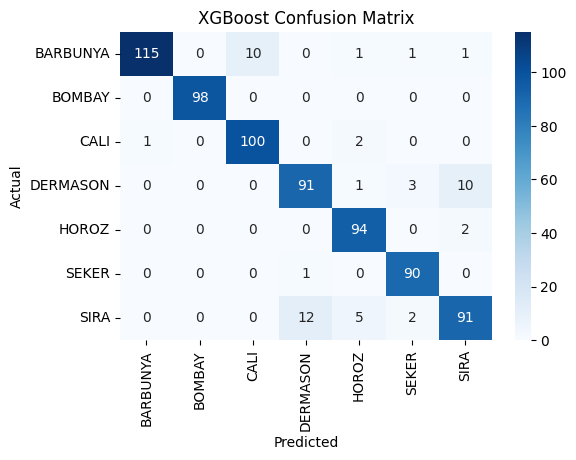

Class Mapping: {0: 'BARBUNYA', 1: 'BOMBAY', 2: 'CALI', 3: 'DERMASON', 4: 'HOROZ', 5: 'SEKER', 6: 'SIRA'}


In [ ]:
class_names = label_encoder.classes_
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()


class_mapping = dict(enumerate(class_names))
print("Class Mapping:", class_mapping)

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='MultiClass', random_seed=42)
catboost_model.fit(X_train, y_train, verbose=False)

In [ ]:
y_pred_cboost = catboost_model.predict(X_test)

accuracy_cboost = accuracy_score(y_test, y_pred_cboost)
print(f"Accuracy: {accuracy_cboost:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_cboost))

Accuracy: 0.9412

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       128
           1       1.00      1.00      1.00        98
           2       0.93      0.96      0.94       103
           3       0.92      0.90      0.91       105
           4       0.91      0.98      0.94        96
           5       0.95      1.00      0.97        91
           6       0.90      0.85      0.87       110

    accuracy                           0.94       731
   macro avg       0.94      0.94      0.94       731
weighted avg       0.94      0.94      0.94       731



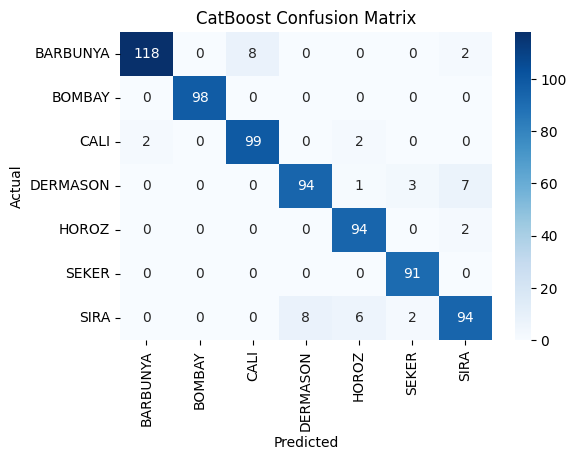

Class Mapping: {0: 'BARBUNYA', 1: 'BOMBAY', 2: 'CALI', 3: 'DERMASON', 4: 'HOROZ', 5: 'SEKER', 6: 'SIRA'}


In [ ]:
class_names = label_encoder.classes_

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_cboost), annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CatBoost Confusion Matrix')
plt.show()

class_mapping = dict(enumerate(class_names))
print("Class Mapping:", class_mapping)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression(max_iter = 2000, solver = "lbfgs")
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [ ]:
y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Accuracy of Logistic Regression: {accuracy_log*100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Accuracy of Logistic Regression: 89.88%
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.82      0.89       128
           1       0.98      0.99      0.98        98
           2       0.83      0.93      0.88       103
           3       0.84      0.86      0.85       105
           4       0.93      0.96      0.94        96
           5       0.93      0.98      0.95        91
           6       0.83      0.80      0.81       110

    accuracy                           0.90       731
   macro avg       0.90      0.91      0.90       731
weighted avg       0.90      0.90      0.90       731



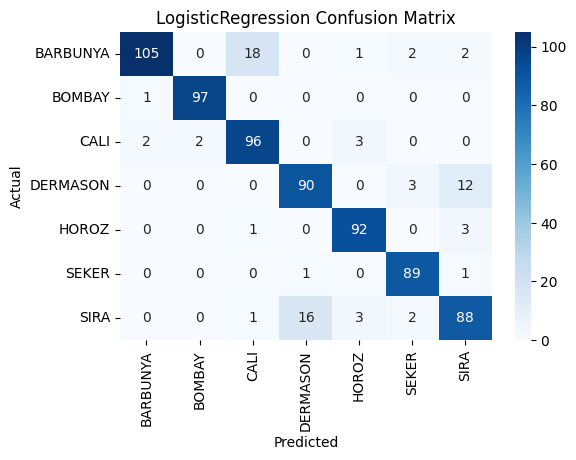

In [ ]:
class_names = label_encoder.classes_

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot = True, fmt = 'd', cmap = 'Blues', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LogisticRegression Confusion Matrix')
plt.show()

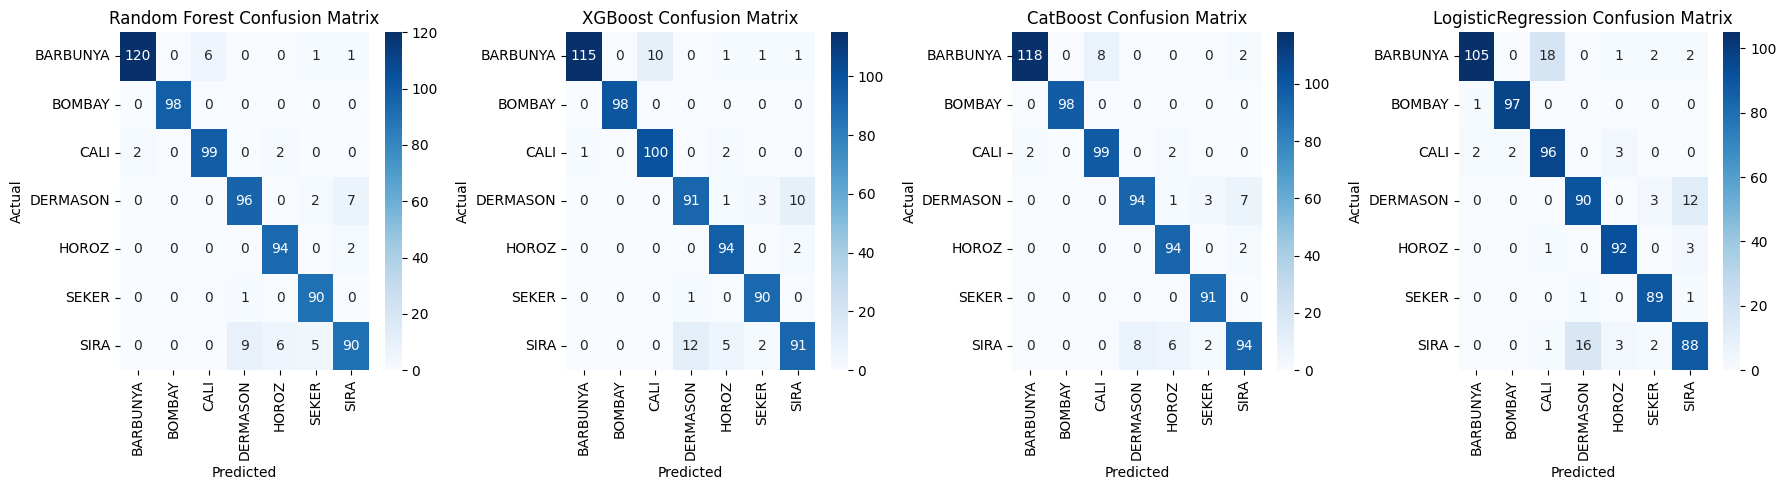

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_cat = confusion_matrix(y_test, y_pred_cboost)
cm_log = confusion_matrix(y_test, y_pred_log)

fig, axes = plt.subplots(1, 4, figsize=(18, 5))

titles = ["Random Forest", "XGBoost", "CatBoost", "LogisticRegression"]
cms = [cm_rf, cm_xgb, cm_cat, cm_log]

for i, ax in enumerate(axes):
    sns.heatmap(cms[i], annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=ax)
    ax.set_title(f'{titles[i]} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:
print(f"Random Forest Accuracy: {accuracy_rf*100:.2f}")
print(f"XGBoost Accuracy: {accuracy_xgb*100:.2f}")
print(f"CatBoost Accuracy: {accuracy_cboost*100:.2f}")
print(f"Logistic Regression Accuracy: {accuracy_log*100:.2f}")

Random Forest Accuracy: 93.98
XGBoost Accuracy: 92.89
CatBoost Accuracy: 94.12
Logistic Regression Accuracy: 89.88


In [ ]:
# Hence, we can conclude with an accuracy of 94.12% that CatBoost has the highest accuracy out of these models,

Thus, the advantages of using Machine Learning to classify the dry beans are:
- Higher, reproducible, and objective sample classification
- Excludes possibility of human inspectors misclassifying specimens
- Faster classification compared to human inspectors

Classification of these beans is critical for seed uniformity and quality assurance

Machine Learning implementation on this dataset gives us a better way of classifying the beans.